# Predicting Heart Disease 

Group Number: 65 | Group Members: Claire Rollins, Edward Li, Erika Kuwabara, Jeff Lu

In [83]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
require(reshape2)
options(repr.matrix.max.rows = 6)

## Introduction 

Cardiovascular disease is the leading cause of death worldwide, with an estimated 17.9 million people dying of cardiovascular diseases in 2019. There are many factors that contribute to the cause of these diseases, including age, sex, blood pressure and more (World Health Organization, 2021). As heart disease affects so many people worldwide, it would be useful to have more tools to diagnose it. We will be exploring this using a KNN classification model and a Heart Disease dataset to predict whether or not someone has heart disease.   


We will be working with data collected in 1988 by researchers in Hungary, California, Cleveland and Switzerland. They collected data on 76 attributes they believe contribute to heart disease. We will only be using 14 of them in our data. This data contains 920 rows and 15 columns. 


### Columns:

|Id|Key|Description|
|-|-|-|
|1|age|in years|
|2|sex|male or female|
|3|cp|chest pain type (typical angina, atypical angina, non-anginal pain, or asymptomatic)|
|4|trestbps|resting blood pressure in mmHg|
|5|chol|serum cholesterol in mg/dl|
|6|fbs|fasting blood sugar > 120 mg/dl, true or false|
|7|restecg|resting electrocardiographic results (normal, ST-T wave abnormality, left ventricular hypertrophy)|
|8|thalach|maximum heart rate|
|9|exang|exercise induced angina, true or false|
|10|oldpeak|ST depression induced by exercise|
|11|slope|slope of peak exercise ST segment (upsloping, flat, downsloping)|
|12|ca|number of major vessels coloured by fluorosopy|
|13|thal|thalassemia, a blood disorder (normal, fixed defect, reversible defect)|
|14|num|heart condition (true or false)|
|15|location|Cleveland, Hungary, Switzerland, California|

Our goal is to answer the question: Can you predict if a patient has heart disease from these collected attributes and if so, compare the accuracy of our model to human doctors to determine if it is reliable for medical use? 

## Preliminary exploratory data analysis

In [2]:
# Load In Each Dataset
cleveland_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE, na.strings = "?")
cleveland_data <- mutate(cleveland_data, location = "Cleveland")
cleveland_data

hungarian_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", header = FALSE, na.strings = "?")
hungarian_data <- mutate(hungarian_data, location = "Hungary")
hungarian_data

switzerland_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", header = FALSE, na.strings = "?")
switzerland_data <- mutate(switzerland_data, location = "Switzerland")
switzerland_data

va_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", header = FALSE, na.strings = "?")
va_data <- mutate(va_data, location = "California")
va_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0,Cleveland


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,Hungary
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,Hungary
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0,Hungary
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1,Hungary
58,0,2,180,393,0,0,110,1,1,2,NA,7,1,Hungary
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1,Hungary


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1,Switzerland
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1,Switzerland
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,3,Switzerland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,NA,2,114,0,1.6,2,2,NA,0,Switzerland
73,0,3,160,0,0,1,121,0,0.0,1,NA,3,1,Switzerland
74,1,2,145,0,NA,1,123,0,1.3,1,NA,NA,1,Switzerland


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
63,1,4,140,260,0,1,112,1,3.0,2,NA,NA,2,California
44,1,4,130,209,0,1,127,0,0.0,NA,NA,NA,0,California
60,1,4,132,218,0,1,140,1,1.5,3,NA,NA,2,California
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,California
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,California
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,California


In [3]:
# Merge Datasets
raw_data <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)
raw_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,California
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,California
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,California


While wrangling, we have renamed both columns and factors to a human-legible form. The code to do so is as follows:

In [4]:
# Modify Column Names
names(raw_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num", "location")

# Interpret columns as factors
# Mappings acquired from https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart_data <- raw_data |> mutate(
    sex = as.factor(sex),
    cp = as.factor(cp),
    fbs = as.logical(fbs),
    restecg = as.factor(restecg),
    exang = as.logical(exang),
    slope = as.factor(slope),
    ca = as.factor(ca),
    thal = as.factor(thal),
    num = as.factor(num > 0)
)

# Solution found online to convert numerial factors to string factors
# https://stackoverflow.com/questions/13613913/how-do-i-convert-certain-columns-of-a-data-frame-to-become-factors
levels(heart_data$sex)<- c("female", "male")
levels(heart_data$cp) <- c("typical angina","atypical angina", "non-anginal pain", "asymptomatic")
levels(heart_data$restecg) <- c("normal","ST-T wave abnormality","hypertrophy")
levels(heart_data$slope) <- c("upsloping","flat","downsloping")
levels(heart_data$thal) <- c("normal", "fixed defect","reversable defect")
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<lgl>,<fct>,<dbl>,<lgl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
63,male,typical angina,145,233,TRUE,hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,FALSE,Cleveland
67,male,asymptomatic,160,286,FALSE,hypertrophy,108,TRUE,1.5,flat,3,normal,TRUE,Cleveland
67,male,asymptomatic,120,229,FALSE,hypertrophy,129,TRUE,2.6,flat,2,reversable defect,TRUE,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,male,asymptomatic,122,223,TRUE,ST-T wave abnormality,100,FALSE,0,NA,NA,fixed defect,TRUE,California
58,male,asymptomatic,NA,385,TRUE,hypertrophy,NA,NA,NA,NA,NA,NA,FALSE,California
62,male,atypical angina,120,254,FALSE,hypertrophy,93,TRUE,0,NA,NA,NA,TRUE,California


Since we are dealing with a classification problem, we remove the non-numerical predictor variables below. We then create
the training and testing sets with a 75/25 split.

In [65]:
set.seed(1000)
#Select only predictor variables
heart_num <- heart_data |>
    select(num, age, trestbps, chol, thalach, oldpeak)
#Split into 75% training and 25% testing
heart_split <- initial_split(heart_num, prop=0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split) 
heart_training

,num,age,trestbps,chol,thalach,oldpeak
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,FALSE,37,130,250,187,3.5
5,FALSE,41,130,204,172,1.4
6,FALSE,56,120,236,178,0.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮
916,TRUE,54,127,333,154,0
918,TRUE,55,122,223,100,0
920,TRUE,62,120,254,93,0


Below, we find that there are 66 rows with NA, which we remove from the training set. We also remove one data point with a resting blood pressure of 0, since it does not make sense. We note that the two classes are more or less balanced. We then find the average values for each variable for each class, and see that heart disease patients appear to be older, have lower cholesterol, higher maximum heart rate, and higher ST depression. 

In [74]:
# Number of observations with missing data
num_na <- heart_training |>
    filter(is.na(age)|is.na(trestbps)|is.na(chol)|is.na(thalach)|is.na(oldpeak))|>
    nrow()
num_na

heart_training_clean <- heart_training |>
    filter(!is.na(age)&!is.na(trestbps)&!is.na(chol)&!is.na(thalach)&!is.na(oldpeak))|>
    filter(trestbps!=0)
    
heart_training_clean

# Distribution of target class
class_dist <- heart_training_clean |>
    group_by(num) |>
    summarize(n=n())
class_dist

# Average values table of each predictor
var_means <- heart_training_clean |>
    group_by(num)|>
    summarize(across(age:oldpeak, mean, na.rm=TRUE))
var_means

[1] 66

num,age,trestbps,chol,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,37,130,250,187,3.5
FALSE,41,130,204,172,1.4
FALSE,56,120,236,178,0.8
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,54,127,333,154,0
TRUE,55,122,223,100,0
TRUE,62,120,254,93,0


num,n
<fct>,<int>
FALSE,280
TRUE,342


num,age,trestbps,chol,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,49.78929,130.7179,230.0321,150.1679,0.4217857
TRUE,56.02047,134.2135,174.3977,127.5556,1.2464912


To decide which predictor variables to use, we graph each of their distributions by class to see if there is a difference between patients that are and are not diagnosed with heart disease.

Using num as id variables

Using num as id variables



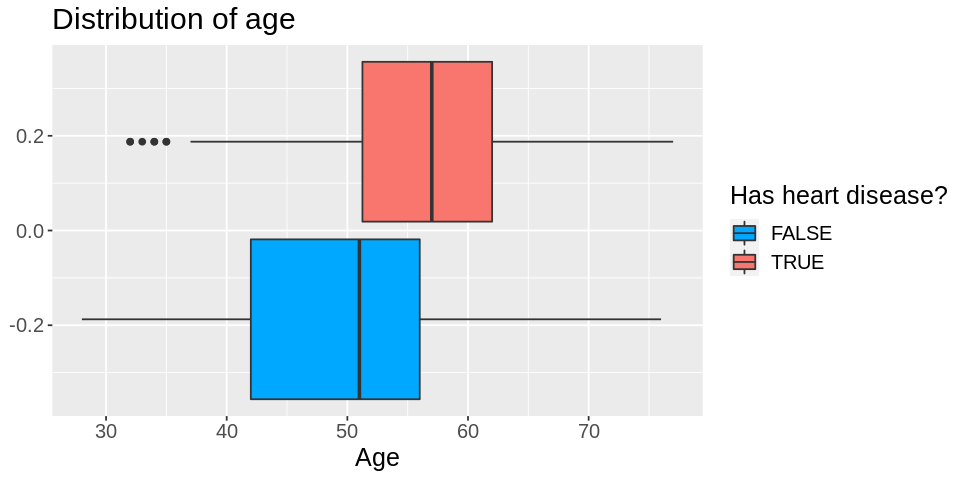

Using num as id variables



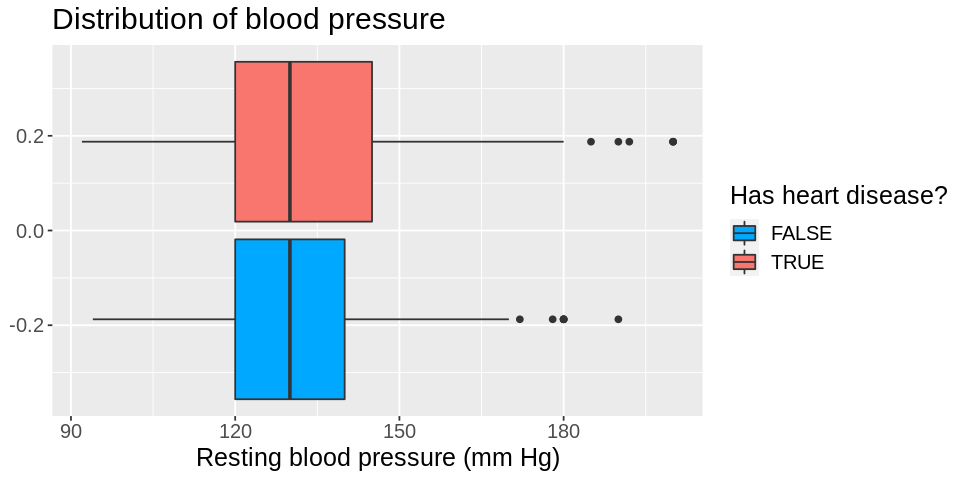

Using num as id variables



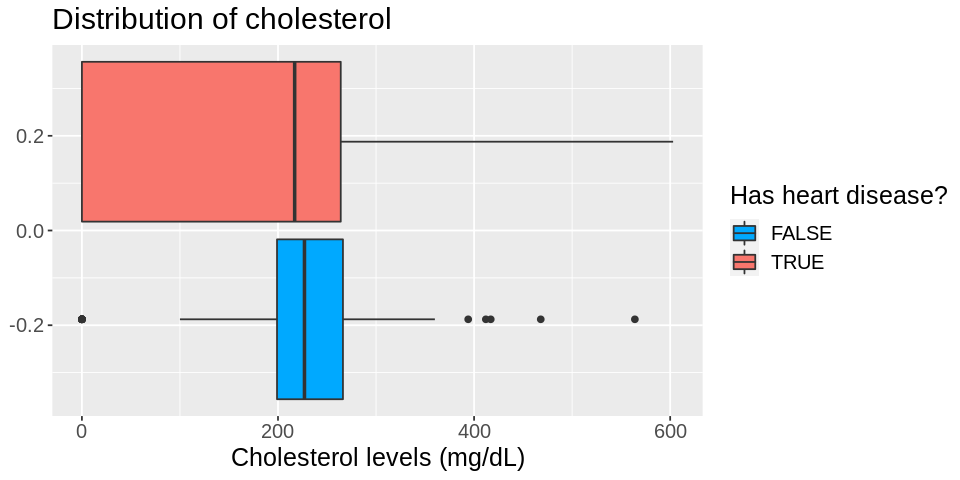

Using num as id variables



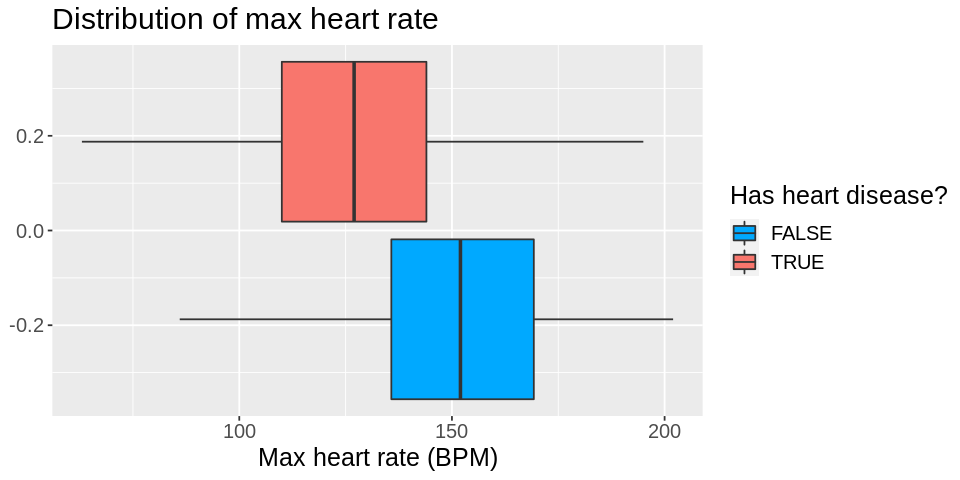

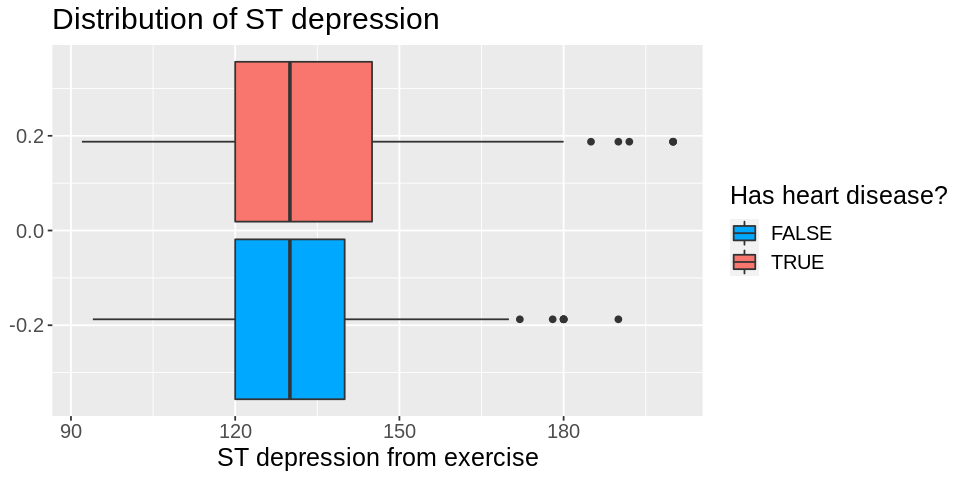

In [84]:
options(repr.plot.width = 8, repr.plot.height = 4)
# Distributions of predictor variables

age_dist <- heart_training_clean |>
    melt()|>
    filter(variable=="age")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="Age", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Distribution of age")
age_dist

trest_dist <- heart_training_clean |>
    melt()|>
    filter(variable=="trestbps")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="Resting blood pressure (mm Hg)", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Distribution of blood pressure")
trest_dist

chol_dist <- heart_training_clean |>
    melt()|>
    filter(variable=="chol")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="Cholesterol levels (mg/dL)", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Distribution of cholesterol")
chol_dist

thalach_dist <- heart_training_clean |>
    melt()|>
    filter(variable=="thalach")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="Max heart rate (BPM)", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Distribution of max heart rate")
thalach_dist

oldpeak_dist <- heart_training_clean |>
    melt()|>
    filter(variable=="trestbps")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="ST depression from exercise", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Distribution of ST depression")
oldpeak_dist

From the average tables and boxplots, we conclude that patients with heart disease tend to be older, have lower maximum heart rates, and have higher ST depression. On the other hand, cholesterol and resting blood pressure do not seem particularly good predictors for heart disease since the distributions between patients diagnosed and not diagnosed with heart disease are about the same, so we remove them.

In [85]:
heart_training_selected <- heart_training_clean |>
    select(-trestbps, -chol)
heart_training_selected

num,age,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>
FALSE,37,187,3.5
FALSE,41,172,1.4
FALSE,56,178,0.8
⋮,⋮,⋮,⋮
TRUE,54,154,0
TRUE,55,100,0
TRUE,62,93,0


## Methods 

We will answer our question by creating a classification model using the K-nearest neighbour with predictors of age, maximum heart rate (thalach) and ST depression (oldpeak). Through visualizations created from our preliminary analysis, we found that these three variables had the most correlation with the presence of heart disease. We will then compare predictions with the testing dataset to measure the model's accuracy. Through a decision boundary plot to visualize the KNN model, we plan to determine if heart disease models are reliable for medical use.

## Expected Outcomes and Significance 

Overall, we expect to predict heart disease from factors such as the patient's age, maximum heart rate, and ST depression induced by exercise. 

Since cardiovascular disease is one of the leading causes of mortality worldwide, it is challenging to identify heart disease due to many contributory risk factors. These predictive findings can determine patterns and relationships associated with heart disease, leading to improvements in medical services. In the future, it may be worthwhile for patients to self-diagnose or speculate about heart disease years before any symptoms arise—ultimately saving lives thanks to early intervention.

This inquiry project can lead to further questions, such as, "How can we further improve the accuracy of our model?" and "What other factors can we use to predict heart disease?"

## Sources 

Cherngs. (2020, March 29). *Heart disease Cleveland UCI.* Kaggle. Retrieved from https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci 

Deshmukh, H. (2020, June 18). *Heart disease UCI-Diagnosis &amp; Prediction - Towards Data Science.* Towards Data Science. Retrieved from https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7 

Detrano, R., Janosi, A., Pfistere, M., & Steinbrunn, W. (1988). *Heart Disease Data Set.* UCI Machine Learning Repository. Retrieved from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

World Health Organization. (2021, June 11). *Cardiovascular diseases (cvds).* World Health Organization. Retrieved from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds) 